# Capstone 3: Data Wrangling

# Imports

In [1]:
#Import necessary packages/libraries

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns

This project will be employing three datasets.

# Initial Look at the Datasets

The datasets were taken from <a href="https://github.com/sdl60660/letterboxd_recommendations">GitHub</a> and <a href="https://www.kaggle.com/datasets/samlearner/letterboxd-movie-ratings-data">Kaggle</a>.

In [2]:
pd.set_option('display.max_columns', None)

## Dataset 1: Ratings

Load the dataset.

In [3]:
dfratings = pd.read_csv('ratings_export.csv')
dfratings.head()

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof


In [4]:
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11078167 entries, 0 to 11078166
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   _id         object
 1   movie_id    object
 2   rating_val  int64 
 3   user_id     object
dtypes: int64(1), object(3)
memory usage: 338.1+ MB


From Kaggle, this first dataset is a set of "movie ratings from top 4000 users at the time of the data crawl by the Kaggle user." The ratings are based on the number of stars given, "with each half-star increment mapped to a 1 to 10 value." 

In [5]:
len(dfratings)

11078167

The dataset has a total of 11,078,167 rows. Note the data type of each column. 

**_ id** is the global unique ID.
<br>
**movie_id** is the unique Letterboxd ID assigned to a movie.
<br>
**rating_val** is the rating value given by a user to a movie on a scale of half-star increments. A half-star is 1. 5 stars is 10.
<br>
**user_id** is the unqiue Letterboxd ID assigned to a user.

In [6]:
dfratings.nunique()

_id           11078167
movie_id        286070
rating_val          10
user_id           7477
dtype: int64

This shows us that 7,477 unique users reviewed 286,070 movies.

### Missing Values

In [7]:
dfratings.isna().sum()

_id           0
movie_id      6
rating_val    0
user_id       0
dtype: int64

There are 6 missing values in the **movie_id** columns.

In [8]:
dfratings[dfratings['movie_id'].isna()]

,_id,movie_id,rating_val,user_id
6766340,5fd05e0ab89a841f5b224790,NaN,6,ghettominibar
6783993,5fd070c6b89a841f5b22a472,NaN,10,lancelubelski
6785171,5fd072a5b89a841f5b22acb6,NaN,6,deepbluefunk
7070391,600c858fba1595b3679dacd2,NaN,5,welovemovies
7306719,6088259e28f29d0115e0c920,NaN,7,ghettominibar
8492587,60fc5207d72bb4dd0a693e08,NaN,5,acervofilmico


We will remove these rows from the dataset

In [9]:
dfratings['movie_id']=dfratings['movie_id'].dropna()

### Duplicates

In [10]:
dfratings.duplicated().sum()

0

Thus, no duplicate values.

## Dataset 2: Users

Load the dataset.

In [11]:
dfusers = pd.read_csv('users_export.csv')
dfusers.head()

,_id,display_name,num_ratings_pages,num_reviews,username
0,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650,deathproof
1,5fc4172ec6cd28ebd99dd0ea,Matt Singer,52.0,1915,superpulse
2,5fc4172ec6cd28ebd99dd0ed,Sean Baker,21.0,1283,lilfilm
3,5fc4172ec6cd28ebd99dd0ee,iana,37.0,1177,ianamurray
4,5fc419171ebf67b9fbe48615,Lizzy,57.0,1810,punchdrunklizzy


In [12]:
dfusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8139 entries, 0 to 8138
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                8139 non-null   object 
 1   display_name       7832 non-null   object 
 2   num_ratings_pages  4747 non-null   float64
 3   num_reviews        8139 non-null   int64  
 4   username           8139 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 318.1+ KB


The second dataset is described by the Kaggle user as a "[v]ery basic data on all users represented in the ratings data. At the time that their ratings data was crawled, they were one of the top users on Letterboxd (though technically is an ever-fluctuating group)."

In [13]:
len(dfusers)

8139

The dataset has a total of 8,139 rows.

**_ id** is the global unique ID.
<br>
**display_name** is the unique Letterboxd ID/username. It is used to form a Letterboxd URL.
<br>
**num_ratings_pages** is the number of pages of ratings
<br>
**num_reviews** is the total number of reviews given by a user.
<br>
**username** is the display name on Letterboxd at the time of the last crawl.

### Missing Values

In [14]:
dfusers.isna().sum()

_id                     0
display_name          307
num_ratings_pages    3392
num_reviews             0
username                0
dtype: int64

There are 3,392 users with missing pages of ratings they've given.

In [15]:
dfusers[dfusers['num_ratings_pages'].isna()]

,_id,display_name,num_ratings_pages,num_reviews,username
4747,6136136b4385873fc48ea127,Exorcism of Emily Reed,NaN,1889,exorcismemily
4748,613613844385873fc48eaf7c,Alicia Haddick,NaN,1223,socialanigirl
4749,613683a94385873fc4f8d763,rod !!,NaN,373,screeningsilver
4750,6136c28d4385873fc4499496,faycwalker,NaN,72,faycwalker
4751,6136c37c4385873fc44a8826,NaN,NaN,3,megveryser
...,...,...,...,...,...
8134,6239b430a936b956009c993c,Máté Turi-Mészáros,NaN,237,mateazember
8135,6239cbf7a936b95600a2d24c,Finn,NaN,297,finnvor1
8136,6239d254a936b95600a4472f,Daniel,NaN,1231,daniel
8137,6239df37a936b95600aa7aa5,ButterflyFilms,NaN,800,butterflyfilms


The **num_ratings_pages** column displays the number of pages of ratings. It seems to contain missing values after a certain row in the dataset. However, these users seem to have given reivews. Thus, we will keep these values as is for now. 

In [16]:
dfusers['display_name'].isna().sum()

307

Above, this makes up nearly 3.8% of the dataset. However, this could just mean that some accounts/users chose not to use display names. Thus, we will leave this column as is. 

### Duplicates

In [17]:
dfusers.duplicated().sum()

0

Thus, no duplicate values.

## Dataset 3: Movies

Load the dataset.

In [18]:
dfmovies = pd.read_csv('movie_data.csv', lineterminator='\n')
#from: https://stackoverflow.com/questions/33998740/error-in-reading-a-csv-file-in-pandascparsererror-error-tokenizing-data-c-err
dfmovies.head()

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
0,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",film-poster/4/6/4/4/4/0/464440-football-freaks...,NaN,NaN,football-freaks,Football Freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,"[""United Kingdom""]",1971-12-05,0.0,[],535272.0,https://www.themoviedb.org/movie/535272/,0.0,0.0,1971.0
1,5fc85ff26758f696344ace0c,[],film-poster/2/4/5/5/0/0/245500-aftermath-0-230...,tt0586129,http://www.imdb.com/title/tt0586129/maindetails,aftermath-1960,Aftermath,en,Aftermath was the pilot for an unsold TV serie...,0.600,[],1960-04-17,22.0,[],318331.0,https://www.themoviedb.org/movie/318331/,8.0,1.0,1960.0
2,5fc85f606758f69634496fcd,"[""Drama""]",film-poster/9/3/3/1/8/93318-where-chimneys-are...,tt0045731,http://www.imdb.com/title/tt0045731/maindetails,where-chimneys-are-seen,Where Chimneys Are Seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,"[""Japan""]",1953-03-05,108.0,"[""日本語""]",117779.0,https://www.themoviedb.org/movie/117779/,6.6,10.0,1953.0
3,5fc85f606758f69634496fd1,"[""Drama""]",NaN,tt0187327,http://www.imdb.com/title/tt0187327/maindetails,the-musicians-daughter,The Musician's Daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,"[""United States of America""]",1911-12-12,15.0,[],560377.0,https://www.themoviedb.org/movie/560377/,0.0,0.0,1911.0
4,5fc85f606758f69634496fd4,"[""Documentary""]",film-poster/4/5/4/6/0/3/454603-50-years-of-fab...,tt4769914,http://www.imdb.com/title/tt4769914/maindetails,50-years-of-fabulous,50 Years of Fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,[],2018-05-17,75.0,[],525187.0,https://www.themoviedb.org/movie/525187/,0.0,0.0,2018.0


In [19]:
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285504 entries, 0 to 285503
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   _id                   285504 non-null  object 
 1   genres                274872 non-null  object 
 2   image_url             264407 non-null  object 
 3   imdb_id               243802 non-null  object 
 4   imdb_link             243802 non-null  object 
 5   movie_id              285502 non-null  object 
 6   movie_title           283340 non-null  object 
 7   original_language     274872 non-null  object 
 8   overview              261248 non-null  object 
 9   popularity            274872 non-null  float64
 10  production_countries  274872 non-null  object 
 11  release_date          271050 non-null  object 
 12  runtime               270055 non-null  float64
 13  spoken_languages      274872 non-null  object 
 14  tmdb_id               279917 non-null  float64
 15  

The third dataset consists of data "on every movie represented in the ratings data, enriched with data from the TMDB API. This makes up a very large, but incomplete set of all movies on Letterboxd."

In [20]:
len(dfmovies)

285504

The dataset has a total of 285,504 rows.

**_ id** is the global unique ID.
<br>
**genres** contains an array of associated movie genres.
<br>
**image_url** is the image used on the Letterboxd site for the movie (often a poster).
<br>
**imdb_id** is the ID for IMDB.
<br>
**imdb_link** is the link to the movie's IMDB page.
<br>
**movie_id** is the unique Letterboxd ID for the movie.
<br>
**movie_title** is the display title for the movie.
<br>
**original_language** is the original language of the movie.
<br>
**overview** is the description of the movie.
<br>
**popularity** is the numeric popularity.
<br>
**production_countries** contains an array of the countries the movie was produced in. 
<br>
**release_date** is the release date of the movie.
<br>
**runtime** is the runtime of the movie in minutes.
<br>
**spoken_languages** contains an array of all the spoken languages in the movie.
<br>
**tmdb_id** is the ID for accessing data on TMDB API (used by the Kaggle dataset user)
<br>
**vote_average** is the vote average.
<br>
**vote_count** is the count of votes the movie received.
<br>
**year_released** is the year the movie was released.

### Missing Values

Total number of missing values per column in this dataset:

In [21]:
dfmovies.isna().sum()

_id                         0
genres                  10632
image_url               21097
imdb_id                 41702
imdb_link               41702
movie_id                    2
movie_title              2164
original_language       10632
overview                24256
popularity              10632
production_countries    10632
release_date            14454
runtime                 15449
spoken_languages        10632
tmdb_id                  5587
tmdb_link                5587
vote_average            10632
vote_count              10632
year_released            7572
dtype: int64

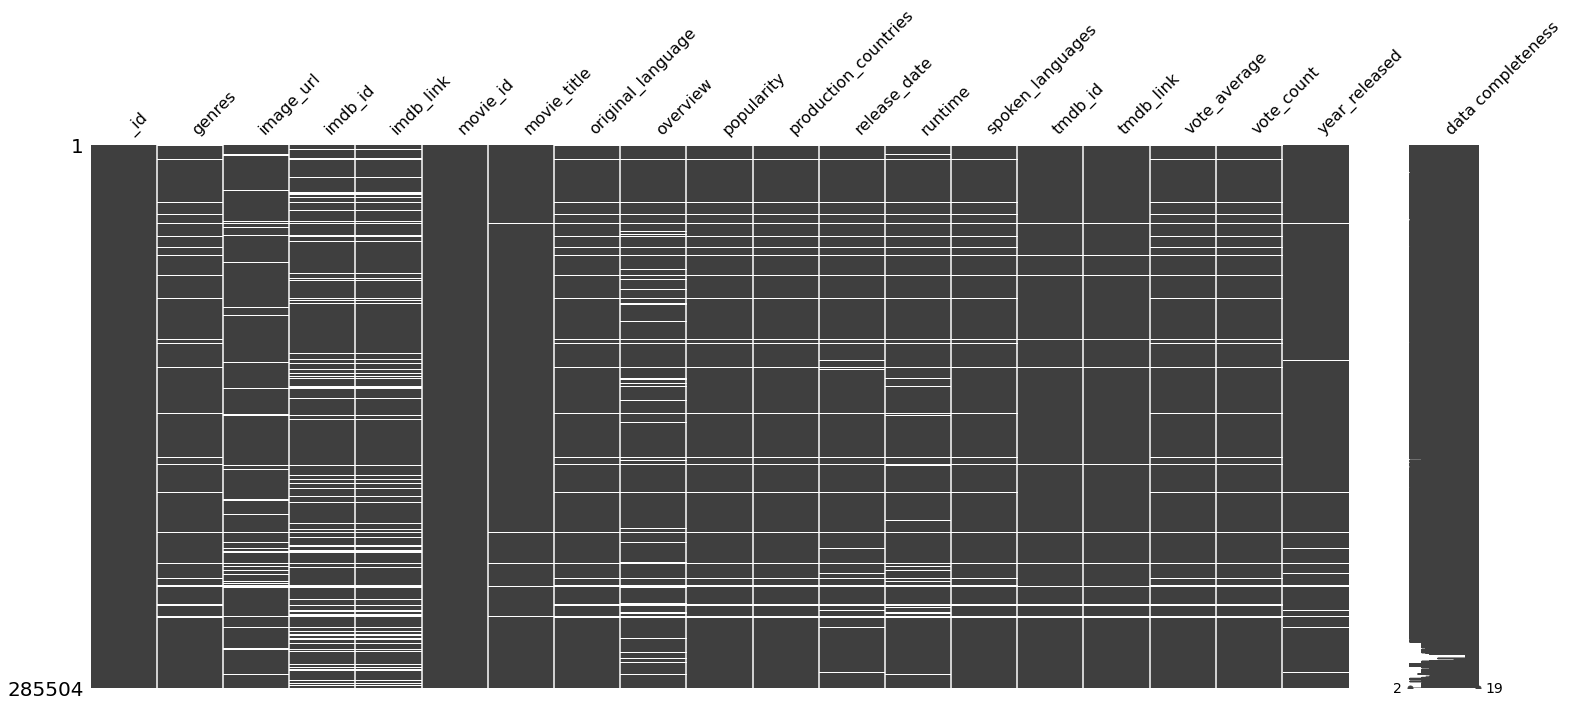

In [22]:
msno.matrix(dfmovies, labels = True)
plt.show()

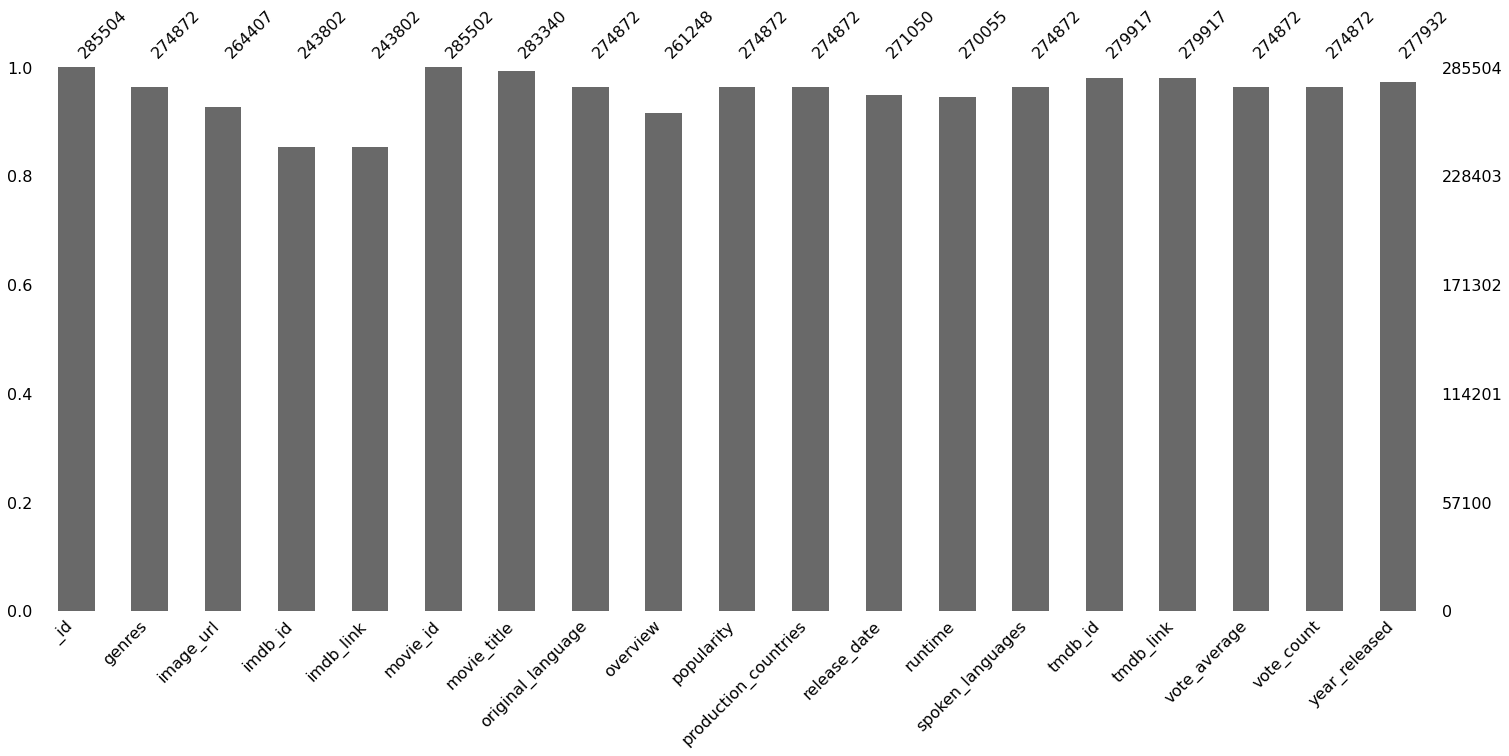

In [23]:
msno.bar(dfmovies, labels = True)
plt.show()

<AxesSubplot:>

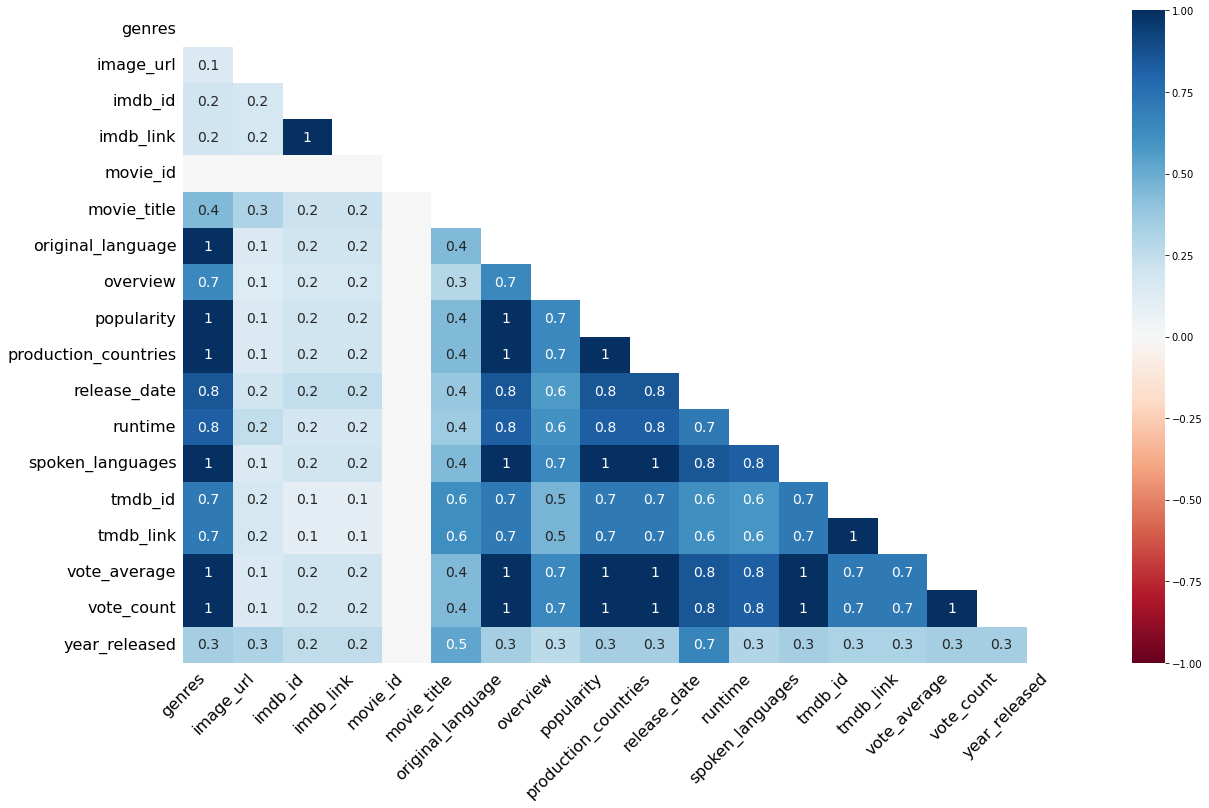

In [24]:
#to identify correlations of nullity between columns
msno.heatmap(dfmovies, labels=True)

Rows that have missing IMDB IDs also have missing IMDB links, as shown by the "1" correlation in the above heat map. 

### Duplicates

In [25]:
dfmovies.duplicated().sum()

0

Thus, no duplicate values in this dataset.

# Merging Datasets

## Users & Ratings

The **dfratings** dataframe has a column **user_id** that is the same as the **username** column in the **dfusers** dataframe. So, we will use a left join to merge these two datasets. 

In [26]:
len(dfusers)

8139

In [27]:
len(dfratings)

11078167

In [28]:
dfusers.head()

,_id,display_name,num_ratings_pages,num_reviews,username
0,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650,deathproof
1,5fc4172ec6cd28ebd99dd0ea,Matt Singer,52.0,1915,superpulse
2,5fc4172ec6cd28ebd99dd0ed,Sean Baker,21.0,1283,lilfilm
3,5fc4172ec6cd28ebd99dd0ee,iana,37.0,1177,ianamurray
4,5fc419171ebf67b9fbe48615,Lizzy,57.0,1810,punchdrunklizzy


In [29]:
dfratings.head()

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof


In [30]:
ru = dfratings.merge(dfusers, how='left', left_on='user_id', right_on='username')

In [31]:
ru.head()

,_id_x,movie_id,rating_val,user_id,_id_y,display_name,num_ratings_pages,num_reviews,username
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650.0,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650.0,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650.0,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650.0,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650.0,deathproof


In [32]:
ru.isna().sum()

_id_x                      0
movie_id                   6
rating_val                 0
user_id                    0
_id_y                   1703
display_name           10593
num_ratings_pages    1563155
num_reviews             1703
username                1703
dtype: int64

In [33]:
ru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11078167 entries, 0 to 11078166
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   _id_x              object 
 1   movie_id           object 
 2   rating_val         int64  
 3   user_id            object 
 4   _id_y              object 
 5   display_name       object 
 6   num_ratings_pages  float64
 7   num_reviews        float64
 8   username           object 
dtypes: float64(2), int64(1), object(6)
memory usage: 845.2+ MB


Let's now clean up this dataframe.
<br>
We can remove the two **id** columns.

In [34]:
ru = ru.drop(['_id_x', '_id_y'], axis=1)

We can also remove the **username** column since it would be repetitive of the **user_id** column. But, first, let's make sure that the two columns are equal.

In [35]:
ru['user_id'].equals(ru['username'])

False

In [36]:
ru['diff'] = np.where(ru['user_id'] == ru['username'] , '1', '0')

In [37]:
ru[ru['diff']=='0']

,movie_id,rating_val,user_id,display_name,num_ratings_pages,num_reviews,username,diff
232505,disorder-2015,5,jacksonmaines,NaN,NaN,NaN,NaN,0
232506,time-to-hunt,5,jacksonmaines,NaN,NaN,NaN,NaN,0
232507,from-prada-to-nada,7,jacksonmaines,NaN,NaN,NaN,NaN,0
232508,a-nice-girl-like-you,7,jacksonmaines,NaN,NaN,NaN,NaN,0
232509,hubie-halloween,7,jacksonmaines,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
5371644,passengers-2016,7,jacksonmaines,NaN,NaN,NaN,NaN,0
5371677,monsters-ball,8,jacksonmaines,NaN,NaN,NaN,NaN,0
5371710,deadpool,7,jacksonmaines,NaN,NaN,NaN,NaN,0
5371789,10000-bc,5,jacksonmaines,NaN,NaN,NaN,NaN,0


So, there are 1,703 rows where there are differences between the **user_id** and the **username**.

In [38]:
ru['username'].isna().sum()

1703

So, these discrepancies exist because there are missing values in the **username** column. Since these rows make up only 0.015% of the total dataset, let's drop these rows.

In [39]:
ru = ru.dropna(subset=['username'])

Now, let's make sure these columns are equal.

In [40]:
ru['user_id'].equals(ru['username'])

True

Great! Now, we can drop **username**.

In [41]:
ru.drop('username', axis=1, inplace=True)

In [42]:
ru.head()

,movie_id,rating_val,user_id,display_name,num_ratings_pages,num_reviews,diff
0,feast-2014,7,deathproof,Lucy,32.0,1650.0,1
1,loving-2016,7,deathproof,Lucy,32.0,1650.0,1
2,scripted-content,7,deathproof,Lucy,32.0,1650.0,1
3,the-future,4,deathproof,Lucy,32.0,1650.0,1
4,mank,5,deathproof,Lucy,32.0,1650.0,1


Now, we can also drop **diff**.

In [43]:
ru.drop('diff', axis=1, inplace=True)

## Adding Movies

To this dataframe, we can now merge the **dfmovies** dataframe on the **movie_id** column.

In [44]:
df = ru.merge(dfmovies, how='left', on='movie_id')

Let's explore this dataframe **df**.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11076470 entries, 0 to 11076469
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   movie_id              object 
 1   rating_val            int64  
 2   user_id               object 
 3   display_name          object 
 4   num_ratings_pages     float64
 5   num_reviews           float64
 6   _id                   object 
 7   genres                object 
 8   image_url             object 
 9   imdb_id               object 
 10  imdb_link             object 
 11  movie_title           object 
 12  original_language     object 
 13  overview              object 
 14  popularity            float64
 15  production_countries  object 
 16  release_date          object 
 17  runtime               float64
 18  spoken_languages      object 
 19  tmdb_id               float64
 20  tmdb_link             object 
 21  vote_average          float64
 22  vote_count            float64
 23  year_

The **df** dataframe has 11,076,470 records!

# Size of the Dataset & Data Wrangling

**df**, as it stands now, is very large and takes up a lot of memory. It would be beneficial to reduce the size.

In [46]:
#let's look at how many unique users we have
len(df['user_id'].unique())

7476

In [47]:
#we want to see the total number of reviews that each user has given in descending order
df['num_reviews'].value_counts()

0.0        126450
14642.0     32271
196.0       28120
454.0       27506
493.0       26074
            ...  
6.0            36
2.0            22
1095.0         16
3364.0          1
1649.0          1
Name: num_reviews, Length: 2379, dtype: int64

There are 126,450 users who have not given any reviews (1.14% of the dataset). This is not helpful for our purposes, so let's drop these rows.

In [48]:
df.drop(df[df.num_reviews == 0.0].index, inplace=True)

In [49]:
df.shape

(10950020, 24)

We can remove the **\_id** column: 

In [50]:
df = df.drop('_id', axis=1)

Now, let's go through the columns one by one.

## movie_id

In [51]:
df['movie_id'].isna().sum()

10

In [52]:
df[df['movie_id'].isna()]

,movie_id,rating_val,user_id,display_name,num_ratings_pages,num_reviews,genres,image_url,imdb_id,imdb_link,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
6764637,NaN,6,ghettominibar,Ivo Mulder,344.0,196.0,"[""Drama""]",film-poster/5/4/5/6/6/7/545667--null--0-230-0-...,tt3572736,http://www.imdb.com/title/tt3572736/maindetails,(NULL),xx,(NULL) is the tale of an unknown girl who brea...,0.6,"[""Germany""]",2013-01-01,5.0,"[""No Language""]",618953.0,https://www.themoviedb.org/movie/618953/,3.0,2.0,2013.0
6764638,NaN,6,ghettominibar,Ivo Mulder,344.0,196.0,[],film-poster/3/1/9/5/1/5/319515-nan-0-230-0-345...,tt3790100,http://www.imdb.com/title/tt3790100/maindetails,Nan,en,Sahim Omar Kalifa's graduating Film.,0.6,[],2008-09-08,30.0,[],384717.0,https://www.themoviedb.org/movie/384717/,5.0,2.0,2008.0
6782291,NaN,10,lancelubelski,Lance,94.0,3284.0,"[""Drama""]",film-poster/5/4/5/6/6/7/545667--null--0-230-0-...,tt3572736,http://www.imdb.com/title/tt3572736/maindetails,(NULL),xx,(NULL) is the tale of an unknown girl who brea...,0.6,"[""Germany""]",2013-01-01,5.0,"[""No Language""]",618953.0,https://www.themoviedb.org/movie/618953/,3.0,2.0,2013.0
6782292,NaN,10,lancelubelski,Lance,94.0,3284.0,[],film-poster/3/1/9/5/1/5/319515-nan-0-230-0-345...,tt3790100,http://www.imdb.com/title/tt3790100/maindetails,Nan,en,Sahim Omar Kalifa's graduating Film.,0.6,[],2008-09-08,30.0,[],384717.0,https://www.themoviedb.org/movie/384717/,5.0,2.0,2008.0
6783470,NaN,6,deepbluefunk,deepbluefunk,101.0,4189.0,"[""Drama""]",film-poster/5/4/5/6/6/7/545667--null--0-230-0-...,tt3572736,http://www.imdb.com/title/tt3572736/maindetails,(NULL),xx,(NULL) is the tale of an unknown girl who brea...,0.6,"[""Germany""]",2013-01-01,5.0,"[""No Language""]",618953.0,https://www.themoviedb.org/movie/618953/,3.0,2.0,2013.0
6783471,NaN,6,deepbluefunk,deepbluefunk,101.0,4189.0,[],film-poster/3/1/9/5/1/5/319515-nan-0-230-0-345...,tt3790100,http://www.imdb.com/title/tt3790100/maindetails,Nan,en,Sahim Omar Kalifa's graduating Film.,0.6,[],2008-09-08,30.0,[],384717.0,https://www.themoviedb.org/movie/384717/,5.0,2.0,2008.0
7068691,NaN,5,welovemovies,We Love Movies!!! 🎬,28.0,858.0,"[""Drama""]",film-poster/5/4/5/6/6/7/545667--null--0-230-0-...,tt3572736,http://www.imdb.com/title/tt3572736/maindetails,(NULL),xx,(NULL) is the tale of an unknown girl who brea...,0.6,"[""Germany""]",2013-01-01,5.0,"[""No Language""]",618953.0,https://www.themoviedb.org/movie/618953/,3.0,2.0,2013.0
7068692,NaN,5,welovemovies,We Love Movies!!! 🎬,28.0,858.0,[],film-poster/3/1/9/5/1/5/319515-nan-0-230-0-345...,tt3790100,http://www.imdb.com/title/tt3790100/maindetails,Nan,en,Sahim Omar Kalifa's graduating Film.,0.6,[],2008-09-08,30.0,[],384717.0,https://www.themoviedb.org/movie/384717/,5.0,2.0,2008.0
7305020,NaN,7,ghettominibar,Ivo Mulder,344.0,196.0,"[""Drama""]",film-poster/5/4/5/6/6/7/545667--null--0-230-0-...,tt3572736,http://www.imdb.com/title/tt3572736/maindetails,(NULL),xx,(NULL) is the tale of an unknown girl who brea...,0.6,"[""Germany""]",2013-01-01,5.0,"[""No Language""]",618953.0,https://www.themoviedb.org/movie/618953/,3.0,2.0,2013.0
7305021,NaN,7,ghettominibar,Ivo Mulder,344.0,196.0,[],film-poster/3/1/9/5/1/5/319515-nan-0-230-0-345...,tt3790100,http://www.imdb.com/title/tt3790100/maindetails,Nan,en,Sahim Omar Kalifa's graduating Film.,0.6,[],2008-09-08,30.0,[],384717.0,https://www.themoviedb.org/movie/384717/,5.0,2.0,2008.0


There are 10 movies that don't have movie IDs. They also don't have titles. 
<br>
When looking at the summaries of the two films, we can see that there are only two unique summaries here. One of these films was produced in Germany, while the other is not specified. 
<br> 
Since these rows only make up a very very small part of our overall dataset, they will be dropped.

In [53]:
df = df.dropna(subset=['movie_id'])

## user_id

In [54]:
df['user_id'].isna().sum()

0

In [55]:
len(df['user_id'].unique())

7454

There are 7,454 unique users in our dataset.

## rating_val

In [56]:
df['rating_val'].unique()

array([ 7,  4,  5, 10,  6,  8,  3,  2,  1,  9], dtype=int64)

Since this is supposed to be the rating given by a user to a movie on a scale of 1 to 10, we should ensure that these are the only values in this column.

In [57]:
df['rating_val'].isna().sum()

0

## display_name

In [58]:
df['display_name'].isna().sum()

8890

There are 8,890 missing values in this column. However, these could just be because some users did not wish to have a display name attached to their account.

## num_ratings_pages

In [59]:
df['num_ratings_pages'].isna().sum()

1561452

There are 1,561,452 rows with missing values in this column. This is ~14% of the overall dataset. Since we removed all users who did not give any reviews, maybe these missing values are associated with users that only have 1 page. Let's take a closer look.

In [60]:
df[df['num_ratings_pages'].isna()]

,movie_id,rating_val,user_id,display_name,num_ratings_pages,num_reviews,genres,image_url,imdb_id,imdb_link,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
8937219,raising-arizona,8,faycwalker,faycwalker,NaN,72.0,"[""Comedy"",""Crime""]",film-poster/5/1/7/0/7/51707-raising-arizona-0-...,tt0093822,http://www.imdb.com/title/tt0093822/maindetails,Raising Arizona,en,When a childless couple of an ex-con and an ex...,11.550,"[""United States of America""]",1987-03-01,94.0,"[""English""]",378.0,https://www.themoviedb.org/movie/378/,7.0,1508.0,1987.0
8937220,in-the-heights,5,faycwalker,faycwalker,NaN,72.0,"[""Drama"",""Music"",""Romance""]",film-poster/3/9/9/5/0/0/399500-in-the-heights-...,tt1321510,http://www.imdb.com/title/tt1321510/maindetails,In the Heights,en,"The story of Usnavi, a bodega owner who has mi...",23.287,"[""United States of America""]",2021-06-10,143.0,"[""English"",""Español""]",467909.0,https://www.themoviedb.org/movie/467909/,7.4,360.0,2021.0
8937221,thunder-force,4,faycwalker,faycwalker,NaN,72.0,"[""Action"",""Adventure"",""Comedy""]",film-poster/5/4/2/5/6/6/542566-thunder-force-0...,tt10121392,http://www.imdb.com/title/tt10121392/maindetails,Thunder Force,en,In a world where supervillains are commonplace...,95.652,"[""United States of America""]",2021-04-09,107.0,"[""English""]",615678.0,https://www.themoviedb.org/movie/615678/,5.7,831.0,2021.0
8937222,judas-and-the-black-messiah,8,faycwalker,faycwalker,NaN,72.0,"[""Drama"",""History""]",film-poster/5/1/1/3/4/2/511342-judas-and-the-b...,tt9784798,http://www.imdb.com/title/tt9784798/maindetails,Judas and the Black Messiah,en,Bill O'Neal infiltrates the Black Panthers on ...,17.873,"[""Canada"",""United States of America""]",2021-02-12,125.0,"[""English""]",583406.0,https://www.themoviedb.org/movie/583406/,7.5,826.0,2021.0
8937223,master-and-commander-the-far-side-of-the-world,8,faycwalker,faycwalker,NaN,72.0,"[""Adventure"",""Drama"",""War""]",sm/upload/du/jf/g4/jt/4o4JyEQldHQiqJn0BBRFppDm...,tt0311113,http://www.imdb.com/title/tt0311113/maindetails,Master and Commander: The Far Side of the World,en,After an abrupt and violent encounter with a F...,11.668,"[""United States of America""]",2003-11-14,138.0,"[""Français"",""Português"",""English""]",8619.0,https://www.themoviedb.org/movie/8619/,7.1,2314.0,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11076465,alien-3,6,turnitip,turnitip,NaN,869.0,"[""Science Fiction"",""Action"",""Horror""]",film-poster/4/7/8/8/8/47888-alien-0-230-0-345-...,tt0103644,http://www.imdb.com/title/tt0103644/maindetails,Alien³,en,After escaping with Newt and Hicks from the al...,22.524,"[""United Kingdom"",""United States of America""]",1992-05-22,114.0,"[""English""]",8077.0,https://www.themoviedb.org/movie/8077/,6.3,4169.0,1992.0
11076466,battleship-potemkin,7,turnitip,turnitip,NaN,869.0,"[""Drama"",""History""]",film-poster/5/1/4/8/1/51481-battleship-potemki...,tt0015648,http://www.imdb.com/title/tt0015648/maindetails,Battleship Potemkin,ru,A dramatized account of a great Russian naval ...,8.771,"[""Soviet Union""]",1925-12-24,75.0,"[""No Language""]",643.0,https://www.themoviedb.org/movie/643/,7.7,800.0,1925.0
11076467,pusher,6,turnitip,turnitip,NaN,869.0,"[""Action"",""Crime"",""Drama"",""Thriller""]",sm/upload/r0/7x/rh/jz/auG6gLxJwl2SkQpnfLqR5WFo...,tt0117407,http://www.imdb.com/title/tt0117407/maindetails,Pusher,da,A drug pusher grows increasingly desperate aft...,6.615,"[""Denmark""]",1996-08-30,105.0,"[""Dansk"",""Srpski"",""svenska""]",2061.0,https://www.themoviedb.org/movie/2061/,7.0,504.0,1996.0
11076468,wild-strawberries,7,turnitip,turnitip,NaN,869.0,"[""Drama""]",sm/upload/7y/dg/6m/fs/je9lvVfSihc4L4yMNmw0rg6o...,tt0050986,http://www.imdb.com/title/tt0050986/maindetails,Wild Strawberries,sv,Crotchety retired doctor Isak Borg travels fro...,13.574,"[""Swed

Let's look at the distribution of the values in this column.

array([[<AxesSubplot:title={'center':'num_ratings_pages'}>]], dtype=object)

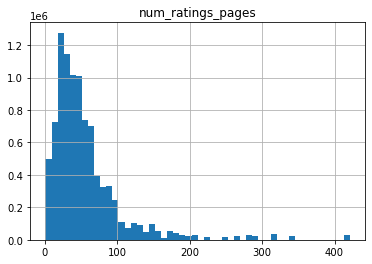

In [61]:
df.hist('num_ratings_pages', bins=50)

The data distribution is skewed and has a right tail. Thus, let's fill in the missing values with the median.

In [62]:
df['num_ratings_pages'].mean(), df['num_ratings_pages'].median()

(56.19525831336399, 43.0)

In [63]:
df['num_ratings_pages'].fillna(df['num_ratings_pages'].median(), inplace=True)

## num_reviews

In [64]:
df['num_reviews'].isna().sum()

0

## genres

In [65]:
df['genres'].unique()

array(['["Animation","Comedy","Drama","Family"]', '["Romance","Drama"]',
       '["Comedy"]', ..., '["Drama","History","Mystery","Comedy"]',
       '["Family","Romance","Action"]',
       '["Crime","Comedy","Family","Mystery","TV Movie"]'], dtype=object)

Each row has the genres of the movie in a list. Before we unwrap this, let's first look at the missing values in the column:

In [66]:
df['genres'].isna().sum()

167540

In [67]:
df.shape

(10950010, 23)

This is 1.53% of the dataset. Let's simply delete these rows.

In [68]:
df = df.dropna(subset=['genres'])

Now, let's unwrap the individual genres for each row.

In [69]:
#Separating all the individual genres

from ast import literal_eval

all_genres = [value for sublist in df['genres'].apply(lambda row: literal_eval(row)) for value in sublist]

from collections import Counter

result = Counter(all_genres)

In [70]:
result

Counter({'Animation': 873610,
         'Comedy': 3252507,
         'Drama': 4720732,
         'Family': 1008526,
         'Romance': 1398950,
         'Fantasy': 1162782,
         'History': 399936,
         'Science Fiction': 1369560,
         'Horror': 1787651,
         'Thriller': 2507826,
         'Crime': 1481975,
         'Mystery': 953630,
         'Music': 400484,
         'Action': 2145189,
         'Adventure': 1686189,
         'TV Movie': 139666,
         'Documentary': 511964,
         'War': 284444,
         'Western': 182244})

In [71]:
len(result)

19

So there are a total of 19 genres throughout the dataset. During the pre-processing phase, we will use One Hot Encoding and/or Dummies on this column. 

## imdb_id, imdb_link

In [72]:
df['imdb_id'].isna().sum()

85051

In [73]:
df['imdb_link'].isna().sum()

85051

Let's delete these 85,051 rows.

In [74]:
df = df.dropna(subset=['imdb_link'])

## image_url

In [75]:
df['image_url'].isna().sum()

19872

Maybe some movies in the dataset just don't have an images attached to them.

## movie_title

In [76]:
df['movie_title'].isna().sum()

0

## original_language

In [77]:
df['original_language'].isna().sum()

0

## overview

In [78]:
df['overview'].isna().sum()

12863

Maybe some movies don't provide an overview or summary.

## popularity

**popularity** is the numeric popularity of a movie.

array([[<AxesSubplot:title={'center':'popularity'}>]], dtype=object)

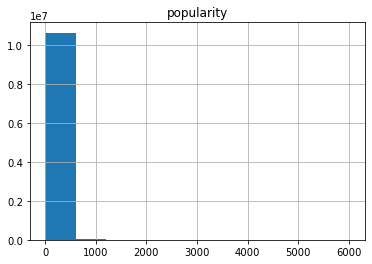

In [79]:
df.hist('popularity')

In [80]:
df['popularity'].max(), df['popularity'].min(), df['popularity'].mode()

(6023.329,
 0.0,
 0    0.6
 Name: popularity, dtype: float64)

Let's look for any missing values.

In [81]:
df['popularity'].isna().sum()

0

## production_countries

This column, like the genre column, is made of a list of the countries that movies were produced in. Thus, we will deal with it in pre-processing suring the cateogrical variables section.
<br><br>
Let's look at any misisng values in this column:

In [82]:
df['production_countries'].isna().sum()

0

## release_date

Let's change the type of the column to a datetime column.

In [83]:
df['release_date'] = pd.to_datetime(df['release_date'])

Now, let's convert the column from a date to number of days since the movie has been released.

In [84]:
df['release_date'] = (pd.Timestamp.today() - df['release_date']).dt.days

In [85]:
df.head(1)

,movie_id,rating_val,user_id,display_name,num_ratings_pages,num_reviews,genres,image_url,imdb_id,imdb_link,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
0,feast-2014,7,deathproof,Lucy,32.0,1650.0,"[""Animation"",""Comedy"",""Drama"",""Family""]",film-poster/2/2/0/1/9/2/220192-feast-0-230-0-3...,tt3689498,http://www.imdb.com/title/tt3689498/maindetails,Feast,en,This Oscar-winning animated short film tells t...,9.26,"[""United States of America""]",2873.0,6.0,"[""English""]",293299.0,https://www.themoviedb.org/movie/293299/,7.9,720.0,2014.0


Now, let's look for missing values.

In [86]:
df['release_date'].isna().sum()

3575

In [87]:
len(df[df['release_date'].isna()]['movie_title'].unique())

1498

This tells us that there are 1,498 movies without a release date provided. 

## runtime

In [88]:
df['runtime'].isna().sum()

4387

In [89]:
len(df[df['runtime'].isna()]['movie_title'].unique())

3239

This tells us that there are 3,239 movies without a runtime provided. 

# spoken_languages

This column, also like **genres** and **production_countries**, is in a list format.

In [90]:
df['spoken_languages'].isna().sum()

0

## tmdb_id, tmdb_link

In [91]:
df['tmdb_id'].isna().sum()

0

In [92]:
df['tmdb_link'].isna().sum()

0

## vote_average

In [93]:
df['vote_average'].isna().sum()

0

In [94]:
df['vote_average'].unique()

array([ 7.9,  6.7,  6.8,  6. ,  6.9,  5.6,  7.3,  7.5,  6.4,  6.5,  6.6,
        5.1,  5.3,  7.2,  7.1,  7.6,  6.1,  4.9,  7. ,  7.4,  5.9,  6.3,
        5.5,  5.4,  5.7,  5.8,  8.1,  7.7,  4.4,  6.2,  8. ,  7.8,  5.2,
        8.6,  8.3,  8.2,  4. ,  5. ,  8.4,  4.7,  4.8,  4.5,  8.7,  2.9,
        4.2,  3.5,  4.1,  3.9,  8.5,  4.3,  0. , 10. ,  3.8,  4.6,  3.7,
        2.7,  3.4,  3.6,  3. ,  2. ,  3.3,  8.9,  3.1,  2.8,  1.8,  1. ,
        1.5,  2.5,  2.6,  1.6,  8.8,  3.2,  2.1,  9. ,  2.3,  2.4,  9.3,
        9.5,  9.7,  1.7,  1.9,  1.1,  9.2,  0.5,  9.1,  2.2,  1.3,  1.4,
        1.2,  9.8,  0.9,  9.4,  0.8,  9.9,  9.6])

All the values are between 0 and 10, inclusive.

array([[<AxesSubplot:title={'center':'vote_average'}>]], dtype=object)

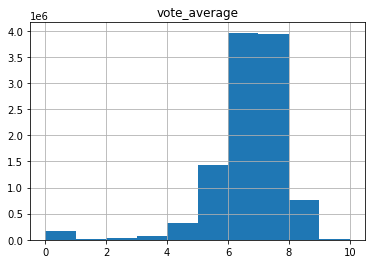

In [95]:
df.hist('vote_average')

## vote_count

In [96]:
df['vote_count'].isna().sum()

0

## year_released

In [97]:
df['year_released'].isna().sum()

3380

Let's keep in mind that the number of missing values in **release_date** are more than the number of missing values in **year_released**. This will be useful information during the pre-processing phase.

# Final Look at Dataset

In [98]:
df.head(3)

,movie_id,rating_val,user_id,display_name,num_ratings_pages,num_reviews,genres,image_url,imdb_id,imdb_link,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
0,feast-2014,7,deathproof,Lucy,32.0,1650.0,"[""Animation"",""Comedy"",""Drama"",""Family""]",film-poster/2/2/0/1/9/2/220192-feast-0-230-0-3...,tt3689498,http://www.imdb.com/title/tt3689498/maindetails,Feast,en,This Oscar-winning animated short film tells t...,9.260,"[""United States of America""]",2873.0,6.0,"[""English""]",293299.0,https://www.themoviedb.org/movie/293299/,7.9,720.0,2014.0
1,loving-2016,7,deathproof,Lucy,32.0,1650.0,"[""Romance"",""Drama""]",sm/upload/yp/k3/5v/2p/wzi191DNSs08gDQHHUxYwlxC...,tt4669986,http://www.imdb.com/title/tt4669986/maindetails,Loving,en,"The story of Richard and Mildred Loving, an in...",18.024,"[""United Kingdom"",""United States of America""]",2132.0,123.0,"[""English""]",339419.0,https://www.themoviedb.org/movie/339419/,6.7,759.0,2016.0
2,scripted-content,7,deathproof,Lucy,32.0,1650.0,"[""Comedy""]",film-poster/2/7/2/9/1/1/272911-scripted-conten...,tt4073494,http://www.imdb.com/title/tt4073494/maindetails,Scripted Content,en,A very short film for Vogue starring Jessica C...,1.400,"[""United States of America""]",3019.0,2.0,[],342914.0,https://www.themoviedb.org/movie/342914/,6.8,5.0,2014.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10697419 entries, 0 to 11076469
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   movie_id              object 
 1   rating_val            int64  
 2   user_id               object 
 3   display_name          object 
 4   num_ratings_pages     float64
 5   num_reviews           float64
 6   genres                object 
 7   image_url             object 
 8   imdb_id               object 
 9   imdb_link             object 
 10  movie_title           object 
 11  original_language     object 
 12  overview              object 
 13  popularity            float64
 14  production_countries  object 
 15  release_date          float64
 16  runtime               float64
 17  spoken_languages      object 
 18  tmdb_id               float64
 19  tmdb_link             object 
 20  vote_average          float64
 21  vote_count            float64
 22  year_released         float64
dtypes: fl

In [100]:
df.shape

(10697419, 23)

In [101]:
#saving dataset
df.to_csv('C:\\Users\\cssv9\\Desktop\\SB DS\\Capstone3\\df.csv')